In [1]:
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import SparsePCA, PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm

import json
import argparse
import sys

import pandas as pd
from pymongo import MongoClient

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')

In [3]:
import utils.dbUtils
import utils.gensimUtils

In [4]:
client = MongoClient('localhost', 27017)
db = client.TFE
collection = db.news_cleaned

In [5]:
vectorizer = TfidfVectorizer()

In [6]:
X_train = vectorizer.fit_transform([res['content'] for res in collection.find({'type' : {'$in' : ['fake', 'reliable']}, 'domain' : {'$nin' : ['nytimes.com', 'beforeitsnews.com']}})])

In [7]:
labels = [res['type'] for res in collection.find({'type' : {'$in' : ['fake', 'reliable']}, 'domain' : {'$nin' : ['nytimes.com', 'beforeitsnews.com']}}, {'type' : 1})]

In [13]:
pca = TruncatedSVD(n_components=3)
pca_t = pca.fit_transform(X_train)

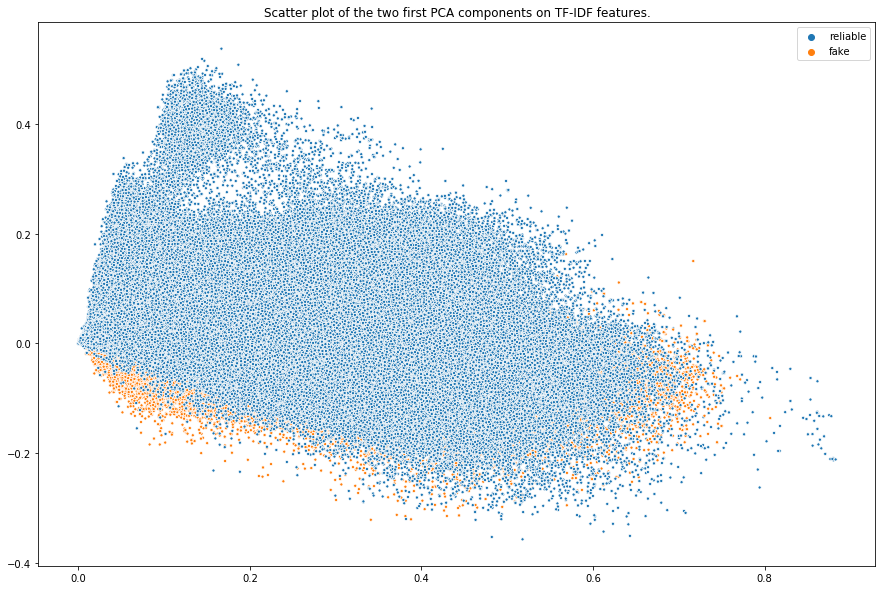

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(15,10))
axes.set(title="Scatter plot of the two first PCA components on TF-IDF features.")
sns.scatterplot(x = pca_t[:,0], y = pca_t[:,1], hue = labels, ax = axes, s = 10)
plt.savefig('fake_corpus_LSA+tfidf.png')

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
pca = TruncatedSVD(n_components=1000)
pca_t = pca.fit_transform(X_train)
X_embedded = TSNE(n_components=2).fit_transform(pca_t)

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(15,10))
axes.set(title="Scatter plot of the two first PCA components on TF-IDF features.")
sns.scatterplot(x = pca_t[:,0], y = pca_t[:,1], hue = labels, ax = axes, s = 10)
plt.savefig('fake_corpus_tsne+tfidf.png')